In [1]:
import chromadb
from openai import OpenAI
from pypdf import PdfReader
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

In [2]:
reader = PdfReader("documents/microsoft_annual_report_2022.pdf")
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

print(pdf_texts[0])

# print(word_wrap(pdf_texts[0]))

1 Dear shareholders, colleagues, customers, and partners:  
We are living through a period of historic economic, societal, and geopolitical change. The world in 2022 looks nothing like 
the world in 2019. As I write this, inflation is at a 40 -year high, supply chains are stretched, and the war in Ukraine is 
ongoing. At the same time, we are entering a technological era with the potential to power awesome advancements 
across every sector of our economy and society. As the world’s largest software company, this places us at a historic 
intersection of opportunity and responsibility to the world around us.  
Our mission to empower every person and every organization on the planet to achieve more has never been more 
urgent or more necessary. For all the uncertainty in the world, one thing is clear: People and organizations in every 
industry are increasingly looking to digital technology to overcome today’s challenges and emerge stronger. And no 
company is better positioned to help th

##### The reason of first doing character split and then doing SentenceTransformersTokenTextSplitter is that ```Large documents may not fit entirely into memory. By first breaking the text into character-level chunks, you can process smaller portions at a time, reducing the memory requirements for each step.```

In [3]:
character_splitter = RecursiveCharacterTextSplitter(
    # It will split on the basis of these below characters like newline etc
    separators=["\n\n", "\n", ". ", " ", ""],
    # If after splitting at separators, it got a big length then it will break down into chunk size of 1000 characters maximum
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
# print(word_wrap(character_split_texts[10]))
print(f"\nTotal chunks: {len(character_split_texts)}")

increased, due in large part to significant global datacenter expansions and the growth in Xbox sales and usage. Despite 
these increases, we remain dedicated to achieving a net -zero future. We recognize that progress won’t always be linear, 
and the rate at which we can implement emissions reductions is dependent on many factors that can fluctuate over time.  
On the path to becoming water positive, we invested in 21 water replenishment projects that are expected to generate 
over 1.3  million cubic meters of volumetric benefits in nine water basins around the world. Progress toward our zero waste 
commitment included diverting more than 15,200 metric tons of solid waste otherwise headed to landfills and incinerators, 
as well as launching new Circular Centers to increase reuse and reduce e -waste at our datacenters.  
We contracted to protect over 17,000 acres of land (50% more than the land we use to operate), thus achieving our

Total chunks: 347


##### ```Character Splitter is not enough due the reason that the embedder which we have to use has limited 256 characters or tokens context window```

In [4]:
# Using SentenceTransformer Splitter not Embedder but the embedder has limited context window width, it uses 256 tokens context window width. 
# So we shall make chunks of 256 tokens.
# Also beyond this 256 characters will be truncated by the embedder. We shall use these chunks and then embed them to the vector database

token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256) # tokens_per_chunk is context window which means that it one chunk would have 256 tokens

# We shall use all the chunks made by character text splitter and we are resplitting them using the token text splitter
token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(token_split_texts[10])
# print(word_wrap(token_split_texts[10]))
print(f"\nTotal chunks: {len(token_split_texts)}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Administrator\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

d:\Anaconda\envs\torch\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

increased, due in large part to significant global datacenter expansions and the growth in xbox sales and usage. despite these increases, we remain dedicated to achieving a net - zero future. we recognize that progress won ’ t always be linear, and the rate at which we can implement emissions reductions is dependent on many factors that can fluctuate over time. on the path to becoming water positive, we invested in 21 water replenishment projects that are expected to generate over 1. 3 million cubic meters of volumetric benefits in nine water basins around the world. progress toward our zero waste commitment included diverting more than 15, 200 metric tons of solid waste otherwise headed to landfills and incinerators, as well as launching new circular centers to increase reuse and reduce e - waste at our datacenters. we contracted to protect over 17, 000 acres of land ( 50 % more than the land we use to operate ), thus achieving our

Total chunks: 349


In [5]:
# Sentence-BERT: Sentence Transformer Embedder allows you to embed small docs, chunks etc by pooling the output
embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([token_split_texts[10]]))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Administrator\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[0.04256269335746765, 0.03321182727813721, 0.030340097844600677, -0.0348665826022625, 0.0684165209531784, -0.08090908825397491, -0.015474393032491207, -0.0014509347965940833, -0.016744492575526237, 0.06770770251750946, -0.05054137855768204, -0.04919535666704178, 0.051399923861026764, 0.09192728996276855, -0.07177837193012238, 0.03951966390013695, -0.0128335477784276, -0.024947475641965866, -0.046228647232055664, -0.024357525631785393, 0.03394964709877968, 0.025502456352114677, 0.027317140251398087, -0.004126211628317833, -0.03633834421634674, 0.0036909214686602354, -0.027430448681116104, 0.004796730820089579, -0.02889624424278736, -0.01887071132659912, 0.03666630759835243, 0.02569584548473358, 0.03131285309791565, -0.06393438577651978, 0.05394403636455536, 0.08225348591804504, -0.04175686463713646, -0.00699579156935215, -0.023486029356718063, -0.030747944489121437, -0.002979236887767911, -0.07790941745042801, 0.009353121742606163, 0.003162869019433856, -0.02225707657635212, -0.0182946

In [6]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("microsoft_annual_report_2022", embedding_function=embedding_function)

ids = [str(i) for i in range(len(token_split_texts))]

chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

349

In [12]:
# %pip install umap-learn

In [7]:
import umap.umap_ as umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [9]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 349/349 [03:58<00:00,  1.46it/s]


In [10]:
from matplotlib import pyplot as plt

(-1.5219337761402132, 9.888915163278579, 5.062980437278748, 10.546022152900695)

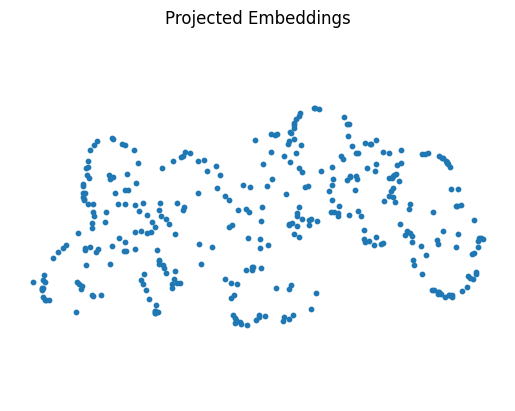

In [11]:
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Relevancy and Distraction

In [18]:
query = "What is the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

revenue, classified by significant product and service offerings, was as follows : ( in millions ) year ended june 30, 2022 2021 2020 server products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22, 488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8, 077 search and news advertising 11, 591 9, 267 8, 524 enterprise services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291 4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast certain previously reported amounts in the table above to conform to the way we internally manage and monitor our business.

74 note 13 — unearned revenue unearned revenue by segment was as follows : ( in millions ) june 30, 2022 2021 productivity and business processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in unearned revenue were as follows : ( in millio

In [19]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


(-1.5219337761402132, 9.888915163278579, 5.062980437278748, 10.546022152900695)

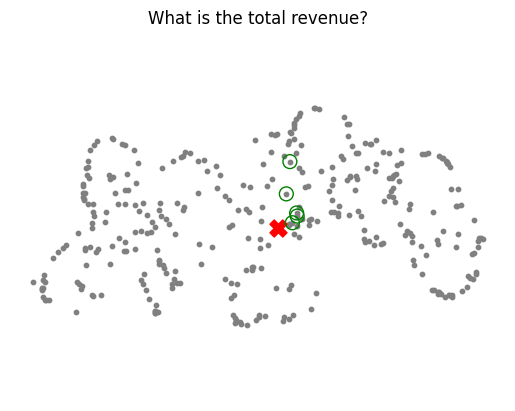

In [20]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [21]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

culture of trust can help navigate the challenges the world faces today. organizations of all sizes have digitized business - critical functions, redefining what they can expect from their business applications. customers are looking to unlock value while simplifying security and management. from infrastructure and data, to business applications and collaboration, we provide unique, differentiated value to customers. we are building a distributed computing fabric – across cloud and the edge – to help every organization build, run, and manage mission - critical workloads anywhere. in the next phase of innovation, artificial intelligence ( “ ai ” ) capabilities are rapidly advancing, fueled by data and knowledge of the world. we are enabling metaverse experiences at all layers of our stack, so customers can more effectively model, automate, simulate, and predict changes within their industrial

every organization turn its data into predictive and analytical power. with our new microsoft 

In [22]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


(-1.5219337761402132, 9.888915163278579, 5.062980437278748, 10.546022152900695)

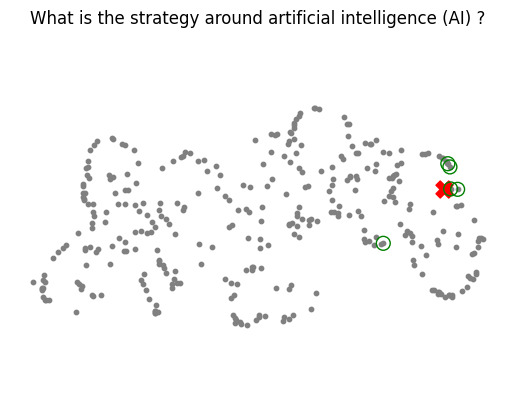

In [23]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [24]:
query = "What has been the investment in research and development?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

• operating expenses increased $ 1. 5 billion or 14 % driven by investments in gaming, search and news advertising, and windows marketing. operating expenses research and development ( in millions, except percentages ) 2022 2021 percentage change research and development $ 24, 512 $ 20, 716 18 % as a percent of revenue 12 % 12 % 0ppt research and development expenses include payroll, employee benefits, stock - based compensation expense, and other headcount - related expenses associated with product development. research and development expenses also include third - party development and programming costs, localization costs incurred to translate software for international markets, and the amortization of purchased software code and services content. research and development expenses increased $ 3. 8 billion or 18 % driven by investments in cloud engineering, gaming, and linkedin. sales and marketing

competitive in local markets and enables us to continue to attract top talent from ac

In [25]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


(-1.5219337761402132, 9.888915163278579, 5.062980437278748, 10.546022152900695)

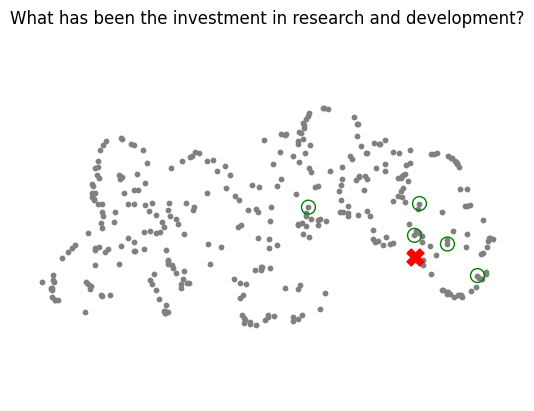

In [26]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [27]:
query = "What has Michael Jordan done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

we use metrics in assessing the performance of our business and to make informed decisions regarding the allocation of resources. we disclose metrics to enable investors to evaluate progress against our ambitions, provide transparency into performance trends, and reflect the continued evolution of our products and services. our commercial and other business metrics are fundamentally connected based on how customers use our products and

our success is based on our ability to create new and compelling products, services, and experiences for our users, to initiate and embrace disruptive technology trends, to enter new geographic and product markets, and to drive broad adoption of our products and services. we invest in a range of emerging technology trends and breakthroughs that we believe offer significant opportunities to deliver value to our customers and growth for the company. based on our assessment of key technology trends, we maintain our long - term commitment to research and de

In [28]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


(-1.5219337761402132, 9.888915163278579, 5.062980437278748, 10.546022152900695)

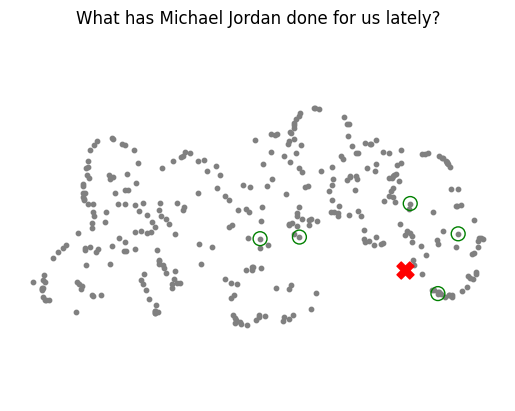

In [29]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')